# A very simple MNIST classifier.
- From the documentation at http://tensorflow.org/tutorials/mnist/beginners/index.md


In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


C:\Users\Karma\Anaconda3\envs\tflo\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def main():
    # Import data
    mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)
    
    # Parameters
    learning_rate = 0.5
    num_iters = 1000
    batch_size = 100
    
    # Create the model
    x = tf.placeholder(tf.float32, [None, 784])
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    y = tf.matmul(x, W) + b

    # Define loss and optimizer
    y_ = tf.placeholder(tf.float32, [None, 10])

    # The raw formulation of cross-entropy,
    #
    #   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
    #                                 reduction_indices=[1]))
    #
    # can be numerically unstable.
    #
    # So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
    # outputs of 'y', and then average across the batch.
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
    train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(cross_entropy)

    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()

    # Start training
    with tf.Session() as sess:
        # Run the initializer
        sess.run(init)  

        # Train
        for _ in range(num_iters):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

        # Test trained model
        correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        print(sess.run(accuracy, feed_dict={x: mnist.test.images,
                                            y_: mnist.test.labels}))

main()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

0.9201


### (a) For each of the output classes, identify 10 misclassified test samples and visualize them in your report. And why do you think they got misclassified


We can see the misclassifications at the end of this section.
- For the brevity of the report class 0 and 1 is shown in detail,
- In case of class 0 the first misclassification is 9 and it appears that the shape of the zero is not proper and the classifier would have weigted towards 9 as opposed to 0.
- In case of class 1 as well we observed similar distortions. If the number 1 was in italics then it was classified sometime as 7.

In [3]:


# Import data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.001
num_steps = 1000
batch_size = 300
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256 
num_input = 784  # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = neural_net(X)
# print(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Checking odd even and calculating the accuracy
odd_correct_pred = tf.equal(((tf.argmax(logits, 1))%2), ((tf.argmax(Y, 1))%2))
odd_accuracy = tf.reduce_mean(tf.cast(odd_correct_pred, tf.float32))

#Validation against the actual data
#odd_index_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
out_Yhat_index = tf.argmax(logits, 1)
out_Y_index = tf.argmax(Y, 1)

# y = tf.cond(condition > 0, lambda: tf.matmul(x, W) + b, lambda: tf.matmul(x, W) - b)
#out_misclass_index = tf.cond(odd_correct_pred == 0, tf.argmax(Y, 1) , -1)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [4]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
       # print(batch_x.shape)
       # print(batch_y.shape)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

            odd_loss, odd_acc = sess.run([loss_op, odd_accuracy], feed_dict={X: batch_x, Y: batch_y})
            print("Step " + str(step) + ", odd Minibatch Loss= " + \
                  "{:.4f}".format(odd_loss) + ", odd Training Accuracy= " + \
                  "{:.3f}".format(odd_acc))
            
    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    print("Odd Testing Accuracy:", \
        sess.run(odd_accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    
    
    out_Yhat, out_Y = sess.run([out_Yhat_index, out_Y_index], feed_dict={X: mnist.test.images, 
                                                      Y: mnist.test.labels})
    print("Vals Testing Accuracy:", out_Yhat)
    

Step 1, Minibatch Loss= 2745.7510, Training Accuracy= 0.143
Step 1, odd Minibatch Loss= 2745.7510, odd Training Accuracy= 0.553
Step 100, Minibatch Loss= 267.0545, Training Accuracy= 0.723
Step 100, odd Minibatch Loss= 267.0545, odd Training Accuracy= 0.867
Step 200, Minibatch Loss= 162.8010, Training Accuracy= 0.827
Step 200, odd Minibatch Loss= 162.8010, odd Training Accuracy= 0.893
Step 300, Minibatch Loss= 96.8825, Training Accuracy= 0.843
Step 300, odd Minibatch Loss= 96.8825, odd Training Accuracy= 0.907
Step 400, Minibatch Loss= 124.0655, Training Accuracy= 0.873
Step 400, odd Minibatch Loss= 124.0655, odd Training Accuracy= 0.910
Step 500, Minibatch Loss= 90.7199, Training Accuracy= 0.873
Step 500, odd Minibatch Loss= 90.7199, odd Training Accuracy= 0.930
Step 600, Minibatch Loss= 64.5962, Training Accuracy= 0.877
Step 600, odd Minibatch Loss= 64.5962, odd Training Accuracy= 0.933
Step 700, Minibatch Loss= 79.5374, Training Accuracy= 0.870
Step 700, odd Minibatch Loss= 79.5374,

(10000, 784) (10000, 10)
Computed: [7 2 1 0 4 1 4 9 6 9]
Label   : [7 2 1 0 4 1 4 9 5 9]
Misclassifications Id:[Class 0]  [324, 717, 895, 1191, 1220, 1468, 1570, 1621, 1712, 1762, 1796]


"  Commented for the sake of the length of the report\nprint('Misclassifications Id:[Class 1] ',miscl1)\nplotSub5by5(miscl1)\n\nprint('Misclassifications Id:[Class 1] ',miscl1)\nplotSub5by5(miscl1)\n\nprint('Misclassifications Id:[Class 1] ',miscl1)\nplotSub5by5(miscl1)\n\n"

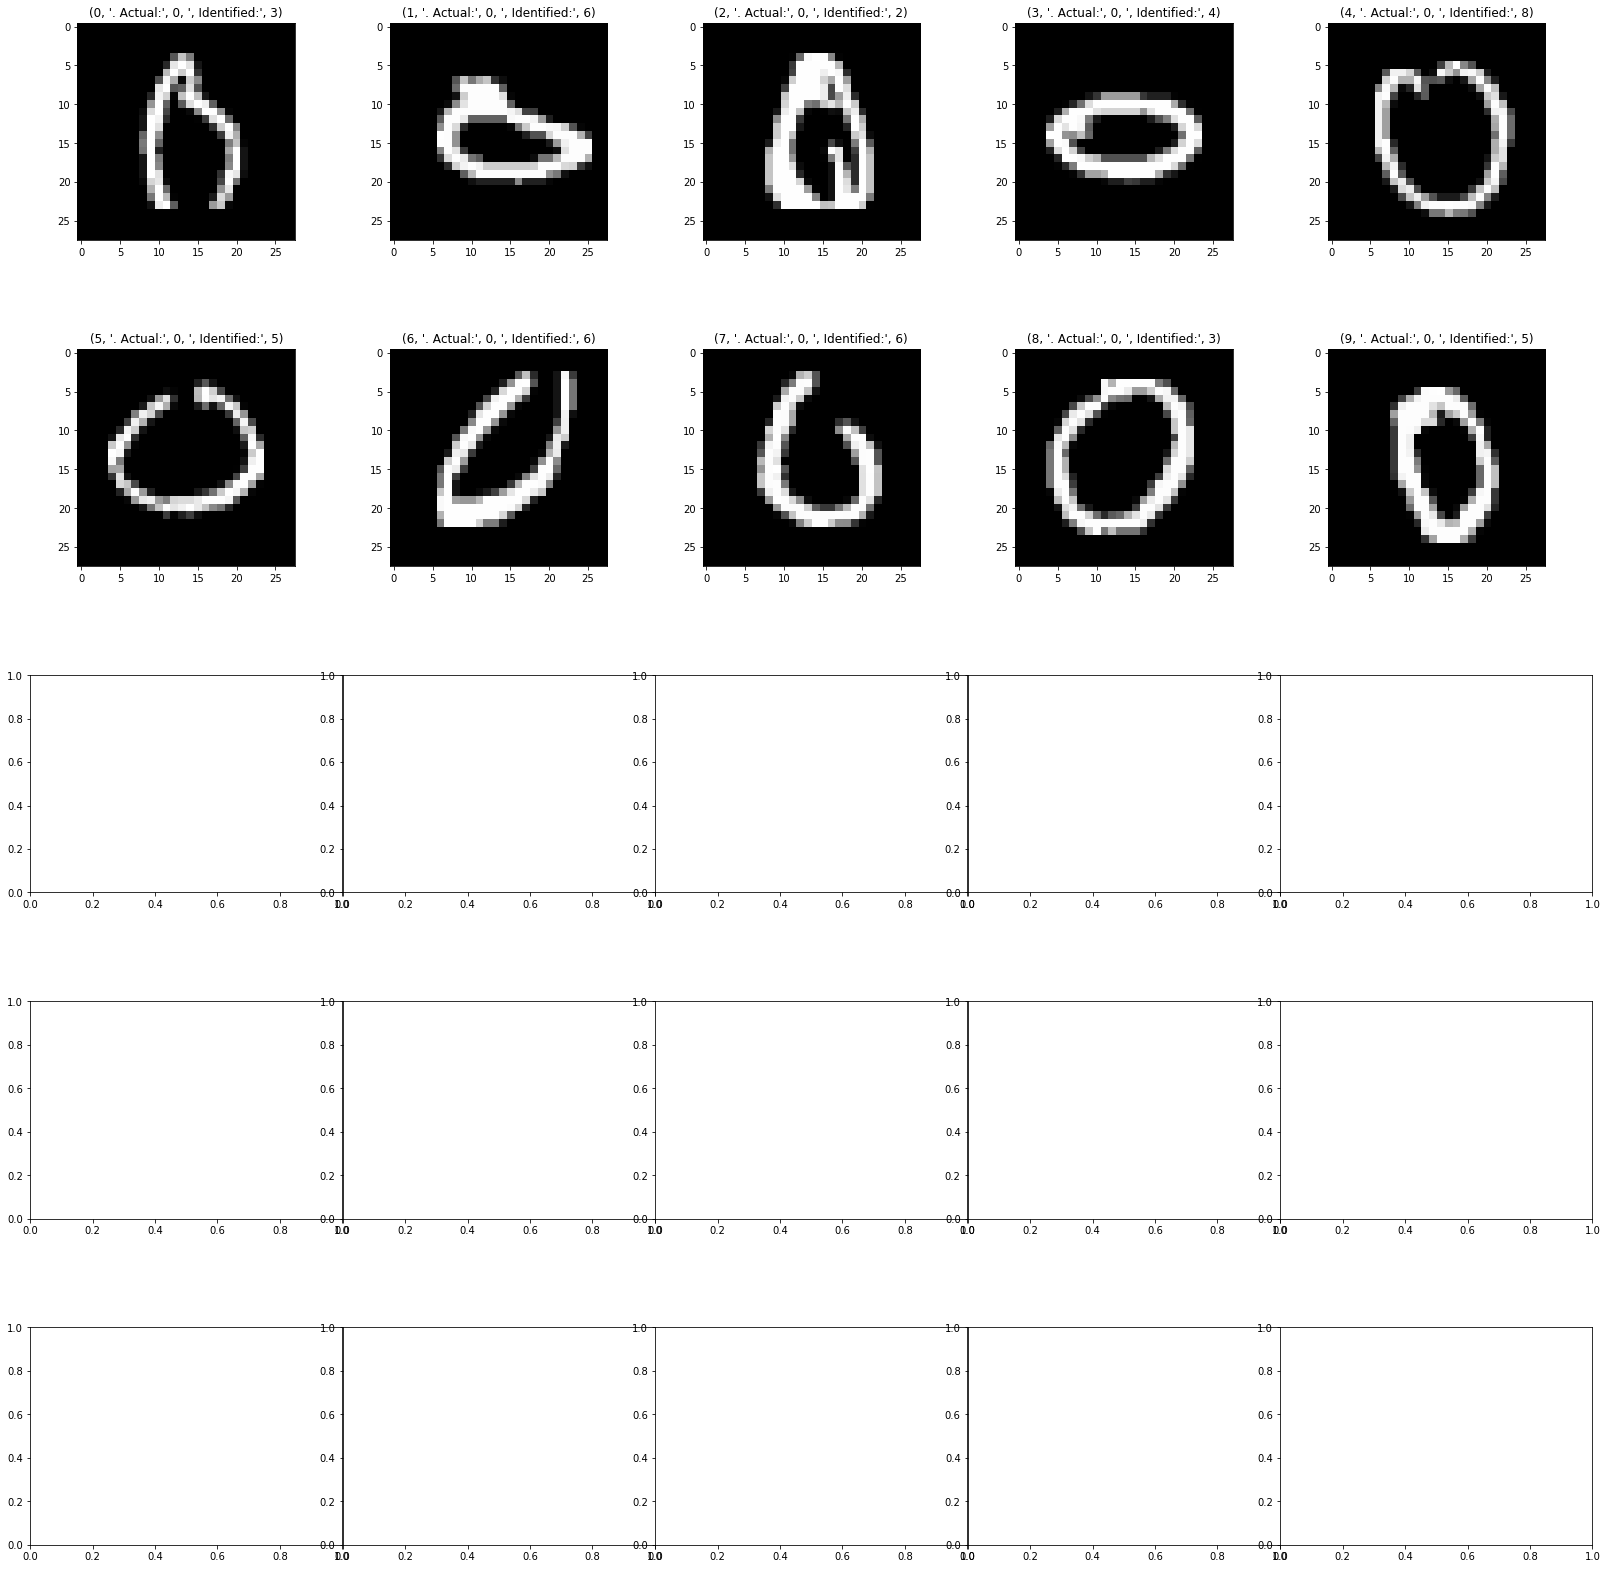

In [5]:


print(mnist.test.images.shape, mnist.test.labels.shape)
print('Computed:', out_Yhat[0:10])
print('Label   :',out_Y[0:10])

miscl0 = []
miscl1 = []
miscl2 = []
miscl3 = []
miscl4 = []
miscl5 = []
miscl6 = []
miscl7 = []
miscl8 = []
miscl9 = []

for i in range(0,5000):
    # For label 0
    if(out_Y[i] != out_Yhat[i]):
        if(out_Y[i] == 0 and len(miscl0) <= 10):
            #print('Misclassified: ', out_Y[i])
            miscl0.append(i)
        if(out_Y[i] == 1 and len(miscl1) <= 10):
            miscl1.append(i)
        if(out_Y[i] == 2 and len(miscl2) <= 10):
            miscl2.append(i)
        if(out_Y[i] == 3 and len(miscl3) <= 10):
            miscl3.append(i)
        if(out_Y[i] == 4 and len(miscl4) <= 10):
            miscl4.append(i)
        if(out_Y[i] == 5 and len(miscl5) <= 10):
            miscl5.append(i)
        if(out_Y[i] == 6 and len(miscl6) <= 10):
            miscl6.append(i)
        if(out_Y[i] == 7 and len(miscl7) <= 10):
            miscl7.append(i)
        if(out_Y[i] == 8 and len(miscl8) <= 10):
            miscl8.append(i)
        if(out_Y[i] == 9 and len(miscl9) <= 10):
            miscl9.append(i)

def plotSub5by5(misclass):
    fig, axs = plt.subplots(5,5, figsize=(28, 28))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i in range(10):
        idx = misclass[i]
        axs[i].imshow(np.reshape(mnist.test.images[idx], [28, 28]), cmap='gray')
        title = i,'. Actual:',out_Y[idx],', Identified:',out_Yhat[idx]
        axs[i].set_title(title)

print('Misclassifications Id:[Class 0] ',miscl0)
plotSub5by5(miscl0)

'''  Commented for the sake of the length of the report
print('Misclassifications Id:[Class 1] ',miscl1)
plotSub5by5(miscl1)

print('Misclassifications Id:[Class 1] ',miscl1)
plotSub5by5(miscl1)

print('Misclassifications Id:[Class 1] ',miscl1)
plotSub5by5(miscl1)

'''



### (b) Instead of modifying the model add a new layer at the end of the network from tutorial. Explain the code changes required and report the results.

The code changes are as follows:
- In the network added a layer 2 with weight h2 and bias b2 (layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']))

In [6]:

# Import data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

# Parameters
learning_rate = 0.001
num_steps = 1000
batch_size = 300
display_step = 100

# Network Parameters
n_hidden_1 = 256 # 1st layer number of neurons
n_hidden_2 = 256
n_hidden_3 = 256
num_input = 784  # MNIST data input (img shape: 28*28)
num_classes = 10 # MNIST total classes (0-9 digits)

# tf Graph input
X = tf.placeholder("float", [None, num_input])
Y = tf.placeholder("float", [None, num_classes])

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([num_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'h3': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_3])),
    'out': tf.Variable(tf.random_normal([n_hidden_3, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'out': tf.Variable(tf.random_normal([num_classes]))
}

# Create model
def neural_net(x):
    # Hidden fully connected layer with 256 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Hidden fully connected layer with 256 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    #hidden layer 3
    layer_3 = tf.add(tf.matmul(layer_2, weights['h3']), biases['b3'])
    # Output fully connected layer with a neuron for each class
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Construct model
logits = neural_net(X)
# print(logits)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Checking odd even and calculating the accuracy
odd_correct_pred = tf.equal(((tf.argmax(logits, 1))%2), ((tf.argmax(Y, 1))%2))
odd_accuracy = tf.reduce_mean(tf.cast(odd_correct_pred, tf.float32))

#Validation against the actual data
#odd_index_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
out_Yhat_index = tf.argmax(logits, 1)
out_Y_index = tf.argmax(Y, 1)

# y = tf.cond(condition > 0, lambda: tf.matmul(x, W) + b, lambda: tf.matmul(x, W) - b)
#out_misclass_index = tf.cond(odd_correct_pred == 0, tf.argmax(Y, 1) , -1)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [7]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for step in range(1, num_steps+1):
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        # Run optimization op (backprop)
        sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
        if step % display_step == 0 or step == 1:
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            print("Step " + str(step) + ", Minibatch Loss= " + \
                  "{:.4f}".format(loss) + ", Training Accuracy= " + \
                  "{:.3f}".format(acc))

            odd_loss, odd_acc = sess.run([loss_op, odd_accuracy], feed_dict={X: batch_x, Y: batch_y})
            print("Step " + str(step) + ", odd Minibatch Loss= " + \
                  "{:.4f}".format(odd_loss) + ", odd Training Accuracy= " + \
                  "{:.3f}".format(odd_acc))
            
    print("Optimization Finished!")

    # Calculate accuracy for MNIST test images
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    print("Odd Testing Accuracy:", \
        sess.run(odd_accuracy, feed_dict={X: mnist.test.images,
                                      Y: mnist.test.labels}))
    
    
    out_Yhat, out_Y = sess.run([out_Yhat_index, out_Y_index], feed_dict={X: mnist.test.images, 
                                                      Y: mnist.test.labels})
    print("Vals Testing Accuracy:", out_Yhat)
    

Step 1, Minibatch Loss= 3468.8357, Training Accuracy= 0.097
Step 1, odd Minibatch Loss= 3468.8357, odd Training Accuracy= 0.420
Step 100, Minibatch Loss= 323.2586, Training Accuracy= 0.743
Step 100, odd Minibatch Loss= 323.2586, odd Training Accuracy= 0.823
Step 200, Minibatch Loss= 164.9360, Training Accuracy= 0.837
Step 200, odd Minibatch Loss= 164.9360, odd Training Accuracy= 0.930
Step 300, Minibatch Loss= 134.4464, Training Accuracy= 0.827
Step 300, odd Minibatch Loss= 134.4464, odd Training Accuracy= 0.907
Step 400, Minibatch Loss= 116.5283, Training Accuracy= 0.847
Step 400, odd Minibatch Loss= 116.5283, odd Training Accuracy= 0.930
Step 500, Minibatch Loss= 76.2588, Training Accuracy= 0.897
Step 500, odd Minibatch Loss= 76.2588, odd Training Accuracy= 0.933
Step 600, Minibatch Loss= 100.7135, Training Accuracy= 0.890
Step 600, odd Minibatch Loss= 100.7135, odd Training Accuracy= 0.953
Step 700, Minibatch Loss= 85.2780, Training Accuracy= 0.903
Step 700, odd Minibatch Loss= 85.2

(10000, 784) (10000, 10)
Computed: [7 2 1 0 4 1 4 9 6 7]
Label   : [7 2 1 0 4 1 4 9 5 9]
Misclassifications Id:[Class 0]  [324, 717, 1191, 1271, 1621, 1748, 1796, 2185, 2370, 2631, 2713]


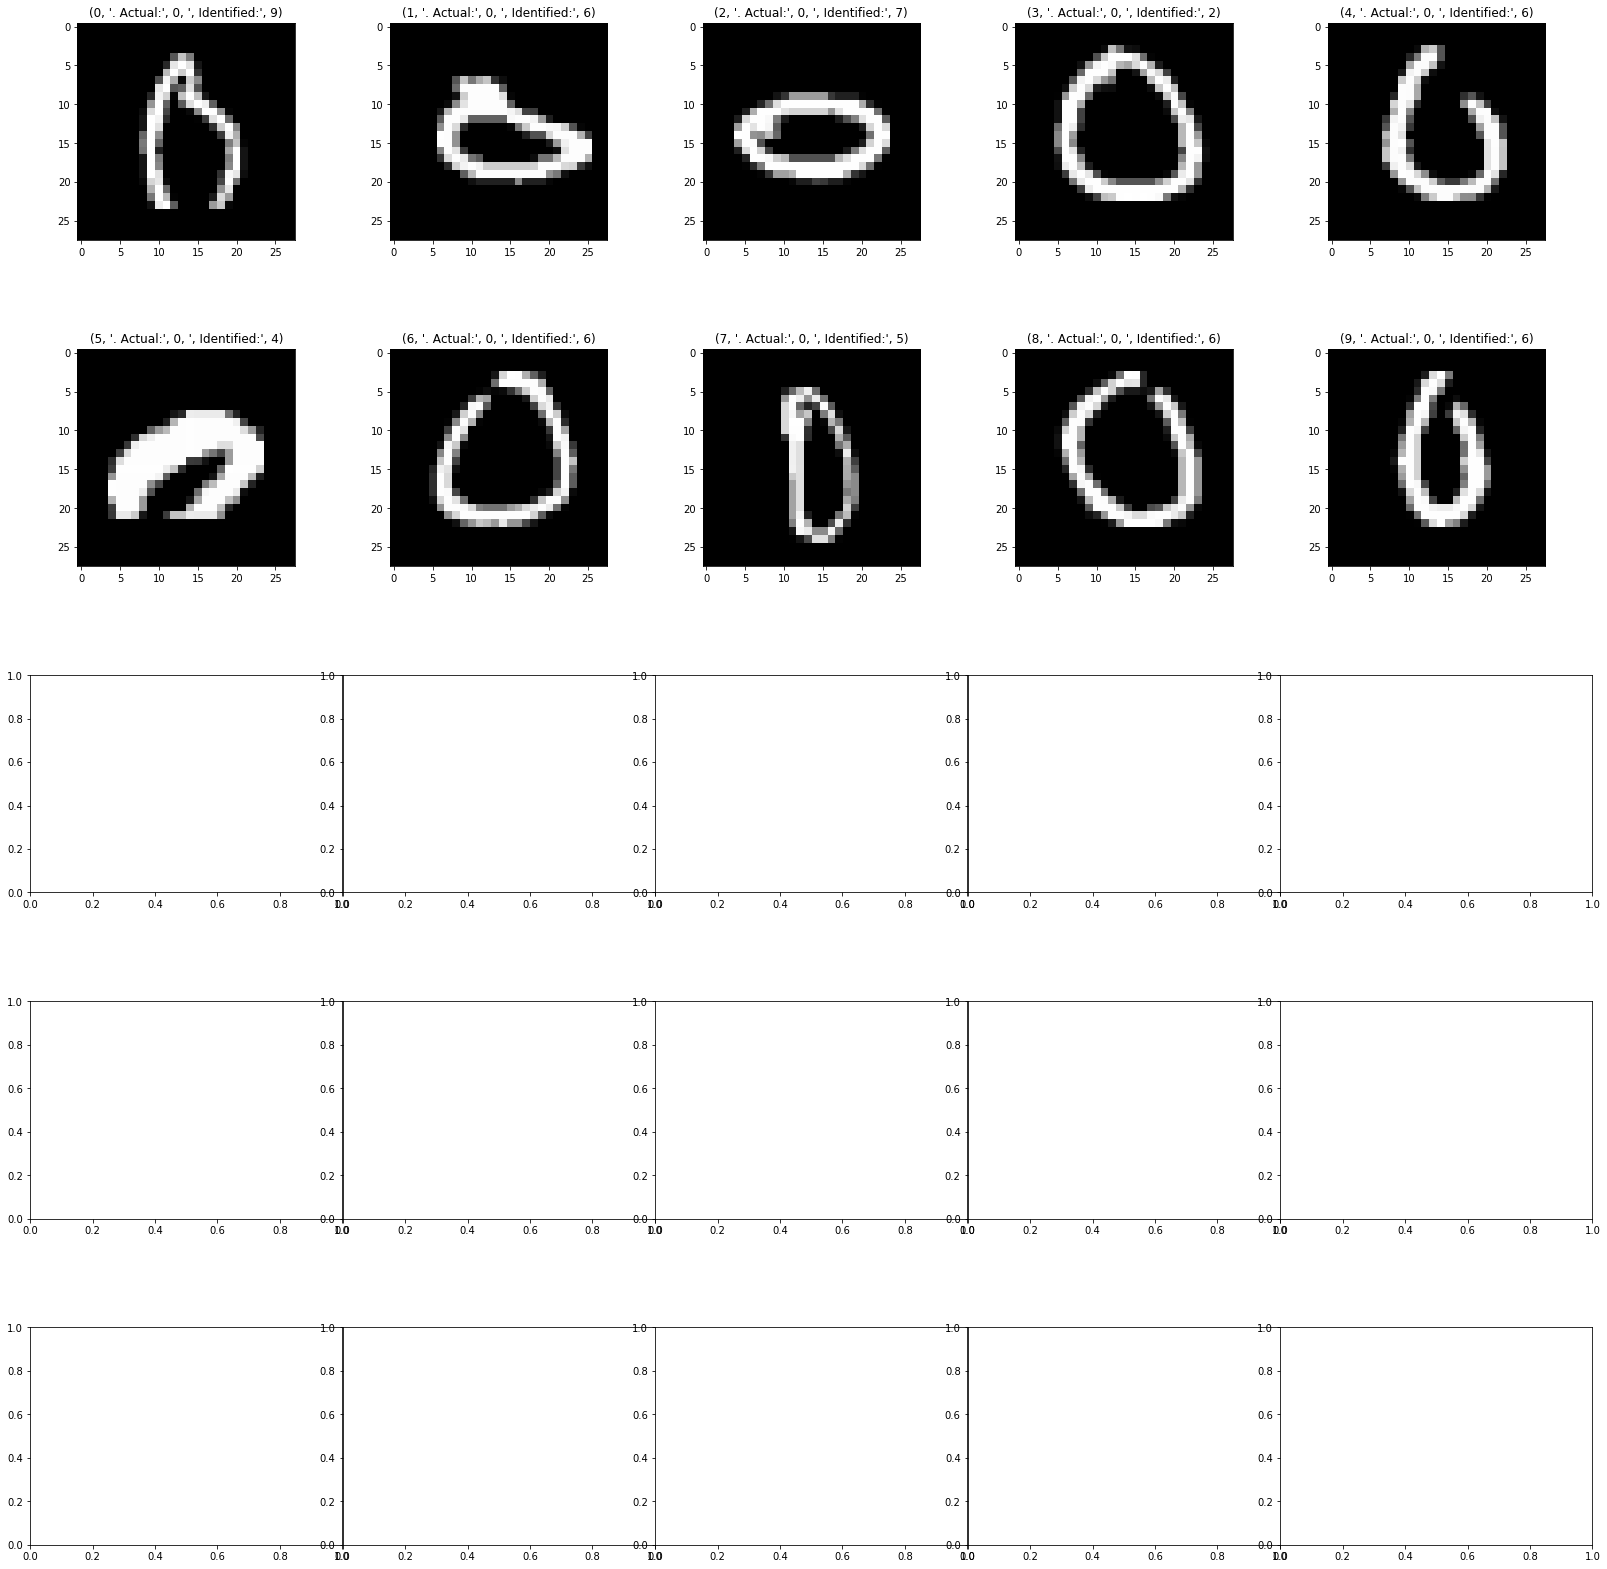

In [8]:
print(mnist.test.images.shape, mnist.test.labels.shape)
print('Computed:', out_Yhat[0:10])
print('Label   :',out_Y[0:10])

miscl0 = []
miscl1 = []
miscl2 = []
miscl3 = []
miscl4 = []
miscl5 = []
miscl6 = []
miscl7 = []
miscl8 = []
miscl9 = []

for i in range(0,5000):
    # For label 0
    if(out_Y[i] != out_Yhat[i]):
        if(out_Y[i] == 0 and len(miscl0) <= 10):
            #print('Misclassified: ', out_Y[i])
            miscl0.append(i)
        if(out_Y[i] == 1 and len(miscl1) <= 10):
            miscl1.append(i)
        if(out_Y[i] == 2 and len(miscl2) <= 10):
            miscl2.append(i)
        if(out_Y[i] == 3 and len(miscl3) <= 10):
            miscl3.append(i)
        if(out_Y[i] == 4 and len(miscl4) <= 10):
            miscl4.append(i)
        if(out_Y[i] == 5 and len(miscl5) <= 10):
            miscl5.append(i)
        if(out_Y[i] == 6 and len(miscl6) <= 10):
            miscl6.append(i)
        if(out_Y[i] == 7 and len(miscl7) <= 10):
            miscl7.append(i)
        if(out_Y[i] == 8 and len(miscl8) <= 10):
            miscl8.append(i)
        if(out_Y[i] == 9 and len(miscl9) <= 10):
            miscl9.append(i)

def plotSub5by5(misclass):
    fig, axs = plt.subplots(5,5, figsize=(28, 28))
    fig.subplots_adjust(hspace = .5, wspace=.001)
    axs = axs.ravel()
    for i in range(10):
        idx = misclass[i]
        axs[i].imshow(np.reshape(mnist.test.images[idx], [28, 28]), cmap='gray')
        title = i,'. Actual:',out_Y[idx],', Identified:',out_Yhat[idx]
        axs[i].set_title(title)

print('Misclassifications Id:[Class 0] ',miscl0)
plotSub5by5(miscl0)


### (c) Explain the conceptual difference between the two methods i.e., modifying the last layer and adding a new layer
- By adding a new network layer we increase the dimensionality
- XOR problem can be solved by using this approach hence it provides a good separation
- Overfitting can be an issue with large number of layers but care should be taken